# Regras de Associação: Algoritmo Apriori
Nesse notebook, vou utilizar o algortimo apriori para gerar regras de associação entre produtos de um supermecado.

### Resumo
- Regras de Associação
- Parametros(Suporte, Confiança, Lift)
- Criação das Regras
- Visualização dos Resultados.  


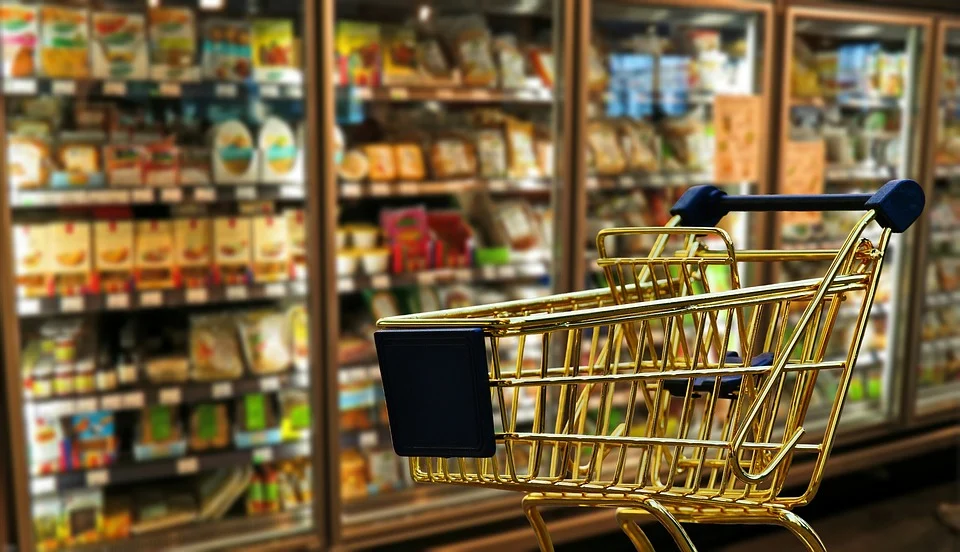

# Regras de Associação

Fazer a associação entre produtos efetuados em compras pode resultar em informações valiosas sobre o comportamento de clientes. 

O objetivo do algoritmo é identificar padrões na compra conjunta de produtos, ou seja, quem compra um produto X tem mais chances de comprar um produto Y. Sabendo dessas informações, uma loja física pode, por exemplo, realocar as prateleiras de forma a colocar próximos um do outro produtos que são normalmente comprados juntos, potencializando as vendas.

Um dos casos clássicos dessa área de Big Data é o da rede de supermecados Walmart, que identificou que pais normalmente compravam fraldas e ja aproveitavam para levar cervejas. Ainda que sejam produtos aparentemente distintos, estudar o comportamento dos clientes mostrou que eles tinham uma forte relação entre si.

# Parâmetros Importantes
## Como são Definidas as Regras de Associação?
Ao analisar uma base de dados com os produtos de muitas transações feitas por clientes, serão gerados alguns indicadores para formular as regras. Eles são feitos com base na frequência em que os produtos aparecem na base de dados, juntos e separados:

## 1. Suporte
Suporte é a porcentagem de transações contendo um item(ou grupo de itens) em relação ao total de transações de toda a base de dados, ou seja:  
**Fórmula:** Suporte(X) = Nº_Transações_Com_X / Nº_Total_de_Transações  

**Exemplo:**  
- **Suporte(Pão) =** Nº_Transações_Com_Pão **/** Nº_Total_de_Transações

## 2.Confiança
Confiança representa a chance dos produtos serem comprados juntos, ou seja, quando um produto X é comprado, então o item Y também será comprado. Supondo que queremos saber a confiança da relação **Pão -> Manteiga**.
Não basta apenas saber a quantidade de vezes em que cada um aparece isolado. Precisamos encontrar quantas vezes que uma pessoa comprou pão, também comprou manteiga. Dessa forma, conseguimos ter uma melhor noção de quando um produto foi comprado por consequência de outro: 

**Fórmula:** Confiança(X->Y) = Suporte(X,Y) / Suporte(X)  

**Exemplo:**  
- **Confiança(Pão -> Manteiga)** = Nº_Registros_Com_Pão_Manteiga / Nº_Total_Registros_Com_Pão  

## 3.Lift
Sabendo da Regra X -> Y, o quão mais frequente é Y quando X ocorre.
Seguindo o exemplo anterior, quem comprou Pão tem (Lift) vezes mais chance de comprar Manteiga do que quem não comprou.

**Fórmula:** Lift(X->Y) = Confiança(X,Y) / Suporte(Y)  

**Exemplo:**  
- **Lift(Pão -> Manteiga)** = Confiança(Pão -> Manteiga) / Suporte(Manteiga)

## Importando as Bibliotecas Necessárias

In [12]:
# Leitura da Base de Dados
import pandas as pd 

# Algoritmo Apriori
from apyori import apriori

# Biblioteca Gráfica
import matplotlib.pyplot as plt

# Importando Base de Dados
Vou usar um dataset com 7500 transações de um supermercado.

In [13]:
base = pd.read_csv('mercado2.csv', header=None)

## Exibindo as 5 primeiras transações:

In [14]:
base.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Nota:** NaN(sigla para Not a Number) é usado para preencher registros quando nenhum produto foi comprado.

## Transações Data Frame x Lista
A função apriori() não aceita os dados nesse formato de dataframe. Por isso, precisamos transformar as transações da base de dados em uma lista.

In [15]:
type(base)

pandas.core.frame.DataFrame

In [16]:
transacoes = []
for i in range(0,7501):
    transacoes.append([str(base.values[i,j]) for j in range(0,20)])

In [17]:
type(transacoes) # Conferindo o Tipo

list

## Gerando Regras
Não queremos gerar todas as regras possiveis, só nos interessa aquelas que tenham uma certa medida de relevância. Por isso, precisamos definir alguns parâmetros mínimos. 
- min_support=0.0045 -> Suporte Mínimo Aceitável
- min_confidence=0.2 -> Confiança Mínima Aceitável
- min_lift=3 -> Lift Mínimo Aceitável
- min_length=2 -> Tamanho mínimo

In [18]:
regras = apriori(transacoes, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

In [19]:
resultados = list(regras)
print(f'Foram criadas ao todo {len(resultados)} regras.')

Foram criadas ao todo 48 regras.


# Visualizando Resultados
De ínicio, a visualização é um pouco complexa, mas se indexarmos alguns valores as regras ficarão mais claras.

In [20]:
# 3 Primeiros Resultados
resultados[:3]

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)])]

# Melhorando Visualização
Apenas pra melhorar um pouco a exibição, vou usar esse loop para printar as 3 primeiras regras e suas métricas.
Mas vou armazenar os valores das confianças e dos lifts para exibir em gráfico posteriormente

In [21]:
count = 1
confiancas, lifts = [], []
print('================================================================')
for item in resultados:
    produtos = item[0]
    items = [x for x in produtos]
    
    if count <= 3:
        print(f'{count}º Regra: {items[0]} -> {items[1]}')
        
        #Suporte, Confiança e Item podem ser acessados indexando item
        print(f'Suporte {item[1]}')
        print(f'Confiança {item[2][0][2]}')
        print(f'Lift {item[2][0][3]}')
        print('================================================================')
        
    lifts.append(item[2][0][3])
    confiancas.append(item[2][0][2])
    count+=1


1º Regra: light cream -> chicken
Suporte 0.004532728969470737
Confiança 0.29059829059829057
Lift 4.84395061728395
2º Regra: mushroom cream sauce -> escalope
Suporte 0.005732568990801226
Confiança 0.3006993006993007
Lift 3.790832696715049
3º Regra: pasta -> escalope
Suporte 0.005865884548726837
Confiança 0.3728813559322034
Lift 4.700811850163794


# Gráfico
Printamos apenas 3 regras, mas 48 foram geradas. Um gráfico nos ajudará a identificar até onde foram as métricas de confiança e lift das nossas regras.

<IPython.core.display.Javascript object>


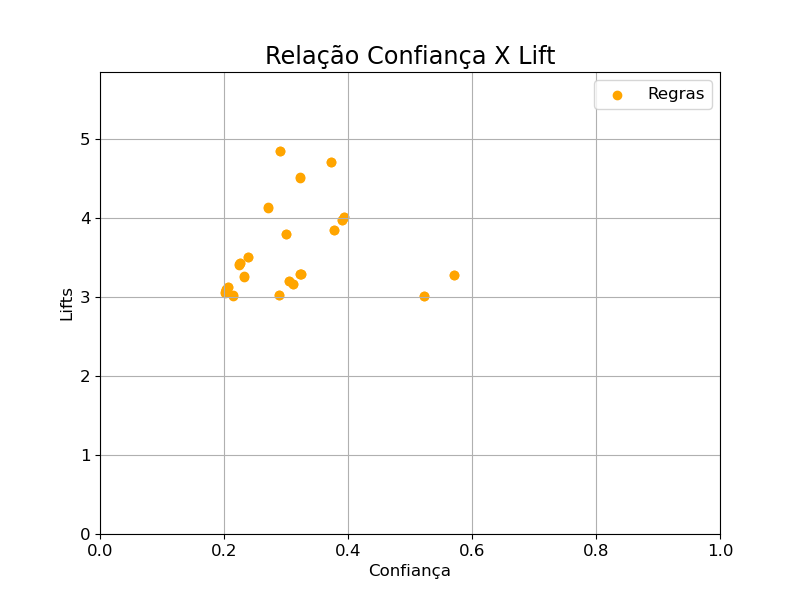

In [22]:
%matplotlib notebook
#Criando Figura
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(confiancas, lifts, color='orange', label='Regras')

#Adicionando Grade no fundo do Gráfico
ax.grid(True)

#Limites X, Y
ax.set_xlim(0,1)
ax.set_ylim(0,max(lifts)+1)

#Labels dos Eixos e Titulo do Grafico
ax.set_xlabel('Confiança', fontsize='medium')
ax.set_ylabel('Lifts', fontsize='medium')
ax.set_title('Relação Confiança X Lift', fontsize='x-large')

#Tamnaho da fonte dos textos exibidos no gráfico
plt.rcParams.update({'font.size': 12})

plt.legend(loc='upper right')
plt.show()

# Conclusão

Ainda é possível gerar uma quantidade totalmente diferente de regras testando novos parametros. Além disso, é importante consultar as regras na sua variavel original(regras), pois a visualização em loop usada vai ocultar alguns itemsets ou trocar a ordem da regra.

Base de dados: Curso Machine Learning e Data Science com Python de A à Z (iaexpert.com)  
[Fonte da Imagem](https://pixabay.com/pt/photos/compras-neg%C3%B3cios-varejo-1165437/)
